# **Исследование объявлений о продаже квартир**

## **Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

- **total_images** — число фотографий квартиры в объявлении
- **last_price** — цена на момент снятия с публикации
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **first_day_exposition** — дата публикации
- **rooms** — число комнат
- **ceiling_height** — высота потолков (м)
- **floors_total** — всего этажей в доме
- **living_area** — жилая площадь в квадратных метрах (м²)
- **floor** — этаж
- **is_apartment** — апартаменты (булев тип)
- **is_studio** — квартира-студия (булев тип)
- **is_open_plan** — свободная планировка (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **balcony** — число балконов
- **locality_name** — название населённого пункта
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **city_centers_nearest"** — расстояние до центра города (м)
- **parks_around_3km** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around_3km** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

*Пояснение*: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Вопросы на которые надо ответить и инструкции которые надо выполнить
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

# Подключаем библиотеки, функции и настраиваем отображение.

Бибилотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Отображение

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = lambda x: f'''{x:_.2f}'''

Функция нахождения значения усов.

In [3]:
def get_whiskers(series):
    q_1 = series.quantile(0.25)
    q_3 = series.quantile(0.75)
    iqr = q_3 - q_1
    whis_low = q_1 - (1.5 * iqr)
    whis_high = q_3 + (1.5 * iqr)
    return (round(whis_low, 2), round(whis_high, 2))

# Осмотр данных и поиск замечаний

## Общий осмотр

In [87]:
df = pd.read_csv("datasets/real_estate_data.csv", sep="\t")

In [88]:
df = df.rename(columns={"studio": "is_studio", 
                        "open_plan": "is_open_plan", 
                        "cityCenters_nearest": "city_centers_nearest",
                        "parks_around3000": "parks_around_3km",
                        "ponds_around3000": "ponds_around_3km"})

Привели некоторые столбцы к более корректному виду.

In [89]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13_000_000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18_863.00,16_028.00,1.00,482.00,2.00,755.00,NaN
1,7,3_350_000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12_817.00,18_603.00,0.00,NaN,0.00,NaN,81.00
2,10,5_196_000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21_741.00,13_933.00,1.00,90.00,2.00,574.00,558.00
3,0,64_900_000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28_098.00,6_800.00,2.00,84.00,3.00,234.00,424.00
4,2,10_000_000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31_856.00,8_098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9_700_000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24_665.00,4_232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3_100_000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2_500_000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11_475_000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39_140.00,10_364.00,2.00,173.00,3.00,196.00,602.00


**locality_name**: нужно привести к нижнему регистру и избавиться от буквы "ё" в словах, для стандартизации столбца.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  is_open_plan          23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**first_day_exposition**: это дата первой публикации, тут нужен тип данных datetime64а не object. **floors_total**: общее число этажей не может быть дробным числом, заменить на int64. **is_apartment**: должен быть булевый тип, а стоит object, проверить. **balcony**: число балконов не может быть дробным, меняем на int64. **parks_around_3km** и **ponds_around_3km**: количество не может быть дробным числом, поменять на int64. **days_exposition**: количество дней не может быть дробным, поменять на int64. 

In [91]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23_699.00,23_699.00,23_699.00,23_699.00,14_504.00,23_613.00,21_796.00,23_699.00,21_421.00,12_180.00,18_157.00,18_180.00,18_181.00,8_079.00,18_181.00,9_110.00,20_518.00
mean,9.86,6_541_548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28_793.67,14_191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10_887_013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12_630.88,8_608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12_190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3_400_000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18_585.00,9_238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4_650_000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26_726.00,13_098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6_800_000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37_273.00,16_293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763_000_000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84_869.00,65_968.00,3.00,3_190.00,3.00,1_344.00,1_580.00


## Поиск странных значений

### Last_price

In [92]:
df[df["last_price"] < 400_000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
8793,7,12_190.00,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,False,False,40.50,NaN,Санкт-Петербург,36_421.00,9_176.00,1.00,805.00,0.00,NaN,8.00


In [93]:
df[df["last_price"] > 400_000_000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
12971,19,763_000_000.00,400.00,2017-09-30T00:00:00,7,NaN,10.00,250.00,10,NaN,False,False,NaN,2.00,Санкт-Петербург,25_108.00,3_956.00,1.00,530.00,3.00,756.00,33.00
14706,15,401_300_000.00,401.00,2016-02-20T00:00:00,5,NaN,9.00,204.00,9,False,False,False,24.00,3.00,Санкт-Петербург,21_912.00,2_389.00,1.00,545.00,1.00,478.00,393.00
19540,8,420_000_000.00,900.00,2017-12-06T00:00:00,12,2.80,25.00,409.70,25,NaN,False,False,112.00,NaN,Санкт-Петербург,30_706.00,7_877.00,0.00,NaN,2.00,318.00,106.00


Есть одна строка с неадекватным значением цены - 12_190 тысяч. Такие цены бувают только на аренду квартир, а у нас продажа, это выброс. От одного значения можно смело избавиться.

### Rooms

In [94]:
df["rooms"].value_counts().sort_index()

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: count, dtype: int64

в **rooms** есть 197 нулевых значений, скорее всего это квартиры-студии. Оставляем как есть.

### Ceiling_height

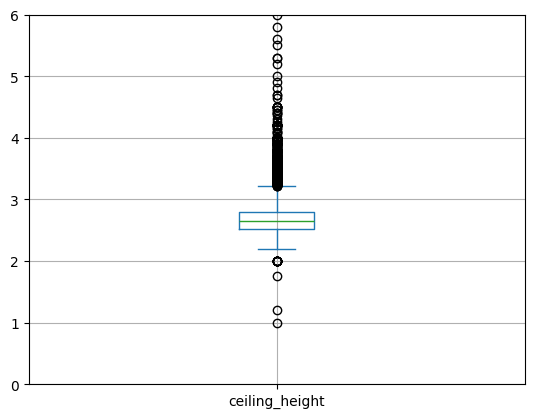

In [96]:
df["ceiling_height"].plot(kind="box", grid=True).set_ylim(0, 6);

In [97]:
df["ceiling_height"].value_counts().sort_index(ascending=False)

ceiling_height
100.00     1
32.00      2
27.50      1
27.00      8
26.00      1
          ..
2.20       1
2.00      11
1.75       1
1.20       1
1.00       1
Name: count, Length: 183, dtype: int64

In [98]:
df.query("ceiling_height < 2.1 | ceiling_height > 4")["ceiling_height"].count()

89

В **ceiling_height** есть всего 89 значений которые или меньше 2.1 метра или выше 4. Вероятно тут ошибка заполнения или выгрузки. В среднем потолки идут от 2.2 метра до 3.2, в редких случаях чуть ниже или чуть выше этого показателя. Просто заменим медианой.

### Days_exposition

<Axes: >

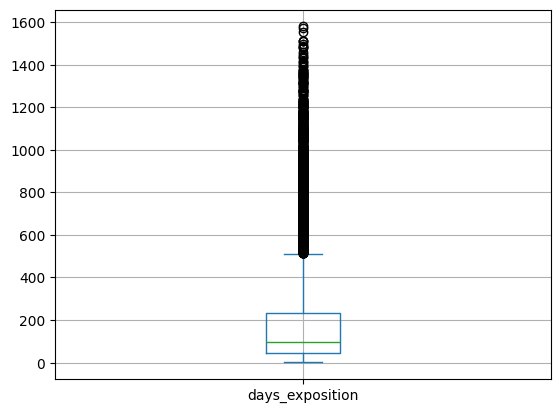

In [99]:
df["days_exposition"].plot(kind="box", grid=True)

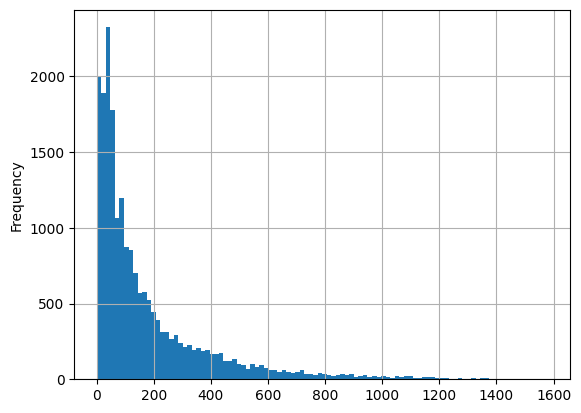

In [100]:
df["days_exposition"].plot(kind="hist", grid=True, bins=100);

В основном обявления висели в приложении от 1 до 500 дней (около полутора лет). Есть и выбросы, где обявления висели больше 1000 дней. Возможно клиенты забывали закрывать обьявления после того как продали квартиру. Это не самый важный показатель, удалять выбросы нельзя, вместе с ними удалятся важные параметры, будем игнорировать его, делая срезы.

## Поиск пропусков

Количество пропусков по столбцам.

In [102]:
df.isna().sum().sort_values()

total_images                0
is_open_plan                0
floor                       0
rooms                       0
is_studio                   0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3km         5518
parks_around_3km         5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**locality_name**: 49 отсутствующих значений, без названия населёного пункта это объявление не имеет смысла, узнать эту информацию у нас нету возможности, удалим эти пропуски.  
**floors_total**: пустые значения вероятно следствие неохоты заполнять этот пункт, или незнание сколько всего этажей (возможно продажа квартиры в которой никогда не были), не трогаем этот параметр.  
**living_area** и **kitchen_area**: тут скорее всего жильцы просто не знают значения этих площадей или не знают как их посчитать или не хотят, оставляем как есть, посчитать и заменить всё равно не возможно.  
**ceiling_height**: тоже что и с площадью жилого пространства и кухни, заменим медианой, потому что потолки имеют стандарт.  
Много отсутствующих значений по балконам, если они не заполнены скорее всего их нет, заменим на 0.  
Очень много отсутствующих значений со всем что связанно с парками, прудами и расстоянием от центра. Наверное причина в том что пользователи просто не знают этих данных и не хотят узнавать. Не самые важные значения, оставляем как есть.  
Самое большое число пропусков в графе с апартаментами, опять же, пользователи скорее всего просто не знают что такое апартаменты и как их определять. Заполнить пропуски не можем, иначе исказим исследования, потому что у нас приложение яндекс.недвижимость значит тут не только жилые помещения, но и апартаменты, оставляем как есть.

Процент пропусков по столбцам.

In [103]:
df.isna().sum().sort_values() / len(df)

total_images           0.00
is_open_plan           0.00
floor                  0.00
rooms                  0.00
is_studio              0.00
total_area             0.00
last_price             0.00
first_day_exposition   0.00
locality_name          0.00
floors_total           0.00
living_area            0.08
kitchen_area           0.10
days_exposition        0.13
ponds_around_3km       0.23
parks_around_3km       0.23
city_centers_nearest   0.23
airports_nearest       0.23
ceiling_height         0.39
balcony                0.49
ponds_nearest          0.62
parks_nearest          0.66
is_apartment           0.88
dtype: float64

## Что нужно исправить:

| <span style="color:orange">1. Странные значения</span> | <span style="color:orange">2. Пропуски</span> | <span style="color:orange">3. Замена типов данных</span> | <span style="color:orange">4. Удаление дубликатов</span> | <span style="color:orange">5. Категоризация и добавление столбцов</span> |
| - | - | - | - | - |
| Исправить названия столбцов | **locality_name**: удалить пропуски. | **first_day_exposition**: заменить тип данных на datetime64 || Создать столбцы с днём, месяцем и годом публикации объявления |
| **locality_name**: привести к нижнему регистру и избавиться от буквы "ё" в словах | **ceiling_height**: заменить пропуски медианой | **balcony**: поменять на Int64 || Этаж квартиры. Варианты - первый, последний, другой |
| **last_price**: удалить значение 12_190 | **balcony**: заменить на 0 |
| **ceiling_height**: заменить выбросы медианой |

## Заметки о том что можно написать в рекомендациях

- В 49 строках нет названий населёных пунктов. Такие обьявление не нужны пользователям. Строже следить за заполнением этого пункта.

# Предобработка данных.

## 1. Странные значения.

### **locality_name**: привести к нижнему регистру и избавиться от буквы "ё" в словах

In [104]:
df["locality_name"] = df["locality_name"].str.lower()

In [105]:
df["locality_name"] = df["locality_name"].str.replace("ё", "е")

In [106]:
df["locality_name"]

0            санкт-петербург
1             поселок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

### **last_price**: удалить значение 12_190

In [107]:
df = df[df["last_price"] > 12_190]

In [108]:
df[df["last_price"] < 12_190].shape[0]

0

### **ceiling_height**: заменить выбросы медианой

In [109]:
df.loc[(df["ceiling_height"] < 2.1) | (df["ceiling_height"] > 4), "ceiling_height"] = df["ceiling_height"].median()

In [110]:
df["ceiling_height"].describe()

count   14_503.00
mean         2.72
std          0.26
min          2.20
25%          2.52
50%          2.65
75%          2.80
max          4.00
Name: ceiling_height, dtype: float64

## 2. Пропуски.

### **locality_name**: удалить пропуски.

In [111]:
df = df.dropna(subset="locality_name")

In [112]:
df["locality_name"].isna().sum()

0

### **ceiling_height**: заменить пропуски медианой

In [113]:
df.loc[df["ceiling_height"].isna(), "ceiling_height"] = df["ceiling_height"].median()

In [114]:
df["ceiling_height"].isna().sum()

0

### **balcony**: заменить на 0

In [115]:
df.loc[df["balcony"].isna(), "balcony"] = 0

In [116]:
df["balcony"].isna().sum()

0

## 3. Замена типов данных.

### **first_day_exposition**: заменить тип данных на datetime64

In [117]:
df["first_day_exposition"]

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23649, dtype: object

In [118]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")

In [119]:
df["first_day_exposition"].info()

<class 'pandas.core.series.Series'>
Index: 23649 entries, 0 to 23698
Series name: first_day_exposition
Non-Null Count  Dtype         
--------------  -----         
23649 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 369.5 KB


### **balcony**: поменять на Int64

In [120]:
df["balcony"] = df["balcony"].astype("int64", errors="ignore")

In [121]:
df["balcony"].info()

<class 'pandas.core.series.Series'>
Index: 23649 entries, 0 to 23698
Series name: balcony
Non-Null Count  Dtype
--------------  -----
23649 non-null  int64
dtypes: int64(1)
memory usage: 369.5 KB


## 4. Удаление дубликатов.

In [122]:
df.duplicated().sum()

0

В таблице нет дубликатов.

## 5. Категоризация и добавление столбцов.

Цена квадратного метра

In [123]:
df["price_per_m2"] = df["last_price"] / df["total_area"]

In [124]:
df[["last_price", "total_area", "price_per_m2"]]

,last_price,total_area,price_per_m2
0,13_000_000.00,108.00,120_370.37
1,3_350_000.00,40.40,82_920.79
2,5_196_000.00,56.00,92_785.71
3,64_900_000.00,159.00,408_176.10
4,10_000_000.00,100.00,100_000.00
...,...,...,...
23694,9_700_000.00,133.81,72_490.85
23695,3_100_000.00,59.00,52_542.37
23696,2_500_000.00,56.70,44_091.71
23697,11_475_000.00,76.75,149_511.40


День недели, месяц, год публикации.

In [125]:
df["exposition_day"] = df["first_day_exposition"].dt.day
df["exposition_month"] = df["first_day_exposition"].dt.month
df["exposition_year"] = df["first_day_exposition"].dt.year

In [126]:
df[["first_day_exposition", "exposition_day", "exposition_month", "exposition_year"]]

,first_day_exposition,exposition_day,exposition_month,exposition_year
0,2019-03-07,7,3,2019
1,2018-12-04,4,12,2018
2,2015-08-20,20,8,2015
3,2015-07-24,24,7,2015
4,2018-06-19,19,6,2018
...,...,...,...,...
23694,2017-03-21,21,3,2017
23695,2018-01-15,15,1,2018
23696,2018-02-11,11,2,2018
23697,2017-03-28,28,3,2017


Этаж квартиры; варианты — первый, последний, другой.

Функция для категоризации по этажам.

In [127]:
def floor_cat(row):
    if row["floor"] == 1:
        return "первый"
    elif row["floor"] == row["floors_total"]:
        return "последний"
    else:
        return "другой"

In [128]:
df["floor_cat"] = df[["floors_total", "floor"]].apply(floor_cat, axis=1)

In [129]:
df[["floors_total", "floor", "floor_cat"]]

,floors_total,floor,floor_cat
0,16.00,8,другой
1,11.00,1,первый
2,5.00,4,другой
3,14.00,9,другой
4,14.00,13,другой
...,...,...,...
23694,5.00,3,другой
23695,5.00,4,другой
23696,3.00,1,первый
23697,17.00,12,другой


Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [130]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_m2,exposition_day,exposition_month,exposition_year,floor_cat
0,20,13_000_000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,0,санкт-петербург,18_863.00,16_028.00,1.00,482.00,2.00,755.00,NaN,120_370.37,7,3,2019,другой
1,7,3_350_000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,False,False,11.00,2,поселок шушары,12_817.00,18_603.00,0.00,NaN,0.00,NaN,81.00,82_920.79,4,12,2018,первый
2,10,5_196_000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,NaN,False,False,8.30,0,санкт-петербург,21_741.00,13_933.00,1.00,90.00,2.00,574.00,558.00,92_785.71,20,8,2015,другой
3,0,64_900_000.00,159.00,2015-07-24,3,2.65,14.00,NaN,9,NaN,False,False,NaN,0,санкт-петербург,28_098.00,6_800.00,2.00,84.00,3.00,234.00,424.00,408_176.10,24,7,2015,другой
4,2,10_000_000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,0,санкт-петербург,31_856.00,8_098.00,2.00,112.00,1.00,48.00,121.00,100_000.00,19,6,2018,другой


In [131]:
df["liv_tot_ratio"] = df["living_area"] / df["total_area"]
df["kit_tot_ratio"] = df["kitchen_area"] / df["total_area"]

In [132]:
df[["total_area", "living_area", "kitchen_area", "liv_tot_ratio", "kit_tot_ratio"]]

,total_area,living_area,kitchen_area,liv_tot_ratio,kit_tot_ratio
0,108.00,51.00,25.00,0.47,0.23
1,40.40,18.60,11.00,0.46,0.27
2,56.00,34.30,8.30,0.61,0.15
3,159.00,NaN,NaN,NaN,NaN
4,100.00,32.00,41.00,0.32,0.41
...,...,...,...,...,...
23694,133.81,73.30,13.83,0.55,0.10
23695,59.00,38.00,8.50,0.64,0.14
23696,56.70,29.70,NaN,0.52,NaN
23697,76.75,NaN,23.30,NaN,0.30


### Общая проверка перед исследовательским анализом данных.

In [133]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_m2,exposition_day,exposition_month,exposition_year,floor_cat,liv_tot_ratio,kit_tot_ratio
0,20,13_000_000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,0,санкт-петербург,18_863.00,16_028.00,1.00,482.00,2.00,755.00,NaN,120_370.37,7,3,2019,другой,0.47,0.23
1,7,3_350_000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,False,False,11.00,2,поселок шушары,12_817.00,18_603.00,0.00,NaN,0.00,NaN,81.00,82_920.79,4,12,2018,первый,0.46,0.27
2,10,5_196_000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,NaN,False,False,8.30,0,санкт-петербург,21_741.00,13_933.00,1.00,90.00,2.00,574.00,558.00,92_785.71,20,8,2015,другой,0.61,0.15
3,0,64_900_000.00,159.00,2015-07-24,3,2.65,14.00,NaN,9,NaN,False,False,NaN,0,санкт-петербург,28_098.00,6_800.00,2.00,84.00,3.00,234.00,424.00,408_176.10,24,7,2015,другой,NaN,NaN
4,2,10_000_000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,0,санкт-петербург,31_856.00,8_098.00,2.00,112.00,1.00,48.00,121.00,100_000.00,19,6,2018,другой,0.32,0.41


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23649 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23649 non-null  int64         
 1   last_price            23649 non-null  float64       
 2   total_area            23649 non-null  float64       
 3   first_day_exposition  23649 non-null  datetime64[ns]
 4   rooms                 23649 non-null  int64         
 5   ceiling_height        23649 non-null  float64       
 6   floors_total          23564 non-null  float64       
 7   living_area           21751 non-null  float64       
 8   floor                 23649 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  is_studio             23649 non-null  bool          
 11  is_open_plan          23649 non-null  bool          
 12  kitchen_area          21380 non-null  float64       
 13  balcony              

In [135]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_m2,exposition_day,exposition_month,exposition_year,liv_tot_ratio,kit_tot_ratio
count,23_649.00,23_649.00,23_649.00,23649,23_649.00,23_649.00,23_564.00,21_751.00,23_649.00,21_380.00,23_649.00,18_115.00,18_138.00,18_139.00,8_063.00,18_139.00,9_085.00,20_469.00,23_649.00,23_649.00,23_649.00,23_649.00,21_751.00,21_380.00
mean,9.86,6_541_402.97,60.33,2017-11-09 23:33:49.024483072,2.07,2.69,10.68,34.45,5.89,10.57,0.59,28_802.81,14_198.14,0.61,490.79,0.77,518.06,180.76,99_436.45,15.48,6.40,2_017.37,0.56,0.19
min,0.00,430_000.00,12.00,2014-11-27 00:00:00,0.00,2.20,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,7_962.96,1.00,1.00,2_014.00,0.02,0.03
25%,6.00,3_400_000.00,40.00,2017-05-15 00:00:00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,18_575.50,9_241.00,0.00,288.00,0.00,293.00,45.00,76_621.16,8.00,3.00,2_017.00,0.50,0.13
50%,9.00,4_650_000.00,52.00,2017-12-12 00:00:00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26_756.00,13_106.00,0.00,454.00,1.00,502.00,95.00,95_000.00,15.00,6.00,2_017.00,0.57,0.17
75%,14.00,6_799_000.00,69.70,2018-08-27 00:00:00,3.00,2.70,16.00,42.30,8.00,12.00,1.00,37_294.00,16_293.00,1.00,612.00,1.00,730.00,231.00,114_277.11,23.00,10.00,2_018.00,0.64,0.23
max,50.00,763_000_000.00,900.00,2019-05-03 00:00:00,19.00,4.00,60.00,409.70,33.00,112.00,5.00,84_869.00,65_968.00,3.00,3_190.00,3.00,1_344.00,1_580.00,1_907_500.00,31.00,12.00,2_019.00,1.00,0.79
std,5.68,10_896_546.84,35.66,NaN,1.08,0.20,6.59,22.04,4.88,5.90,0.96,12_637.54,8_606.99,0.80,342.56,0.94,277.84,219.78,50_334.86,8.64,3.49,1.04,0.11,0.07


# Исследовательский анализ данных (EDA).

In [4]:
df = pd.read_csv("datasets/clean_real_estate_data.csv")

In [5]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format="%Y-%m-%d")

## Инструкция 1: Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

### Площадь.

In [6]:
df["total_area"].describe()

count   23_649.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Медианое значение площади 60 метров квадратных, минимальное значение 12 метров квадратных, максимальное 900 метров квадратных.

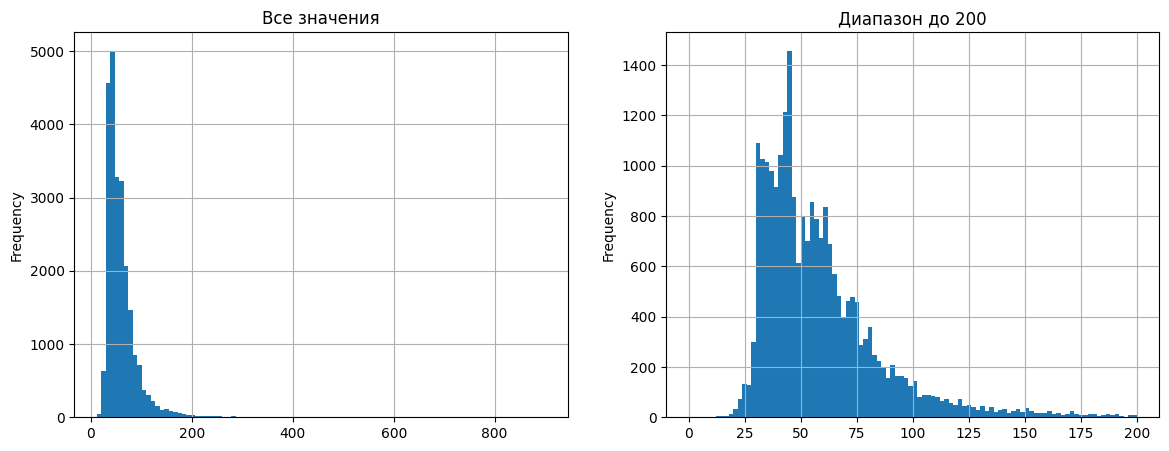

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

df["total_area"].plot(kind="hist", grid=True, bins=100, ax=axs[0], title="Все значения");
df["total_area"].plot(kind="hist", grid=True, bins=100, ax=axs[1],  range=(0, 200), title="Диапазон до 200");

plt.show()

Основная масса значений площади в районе от 25 квадратных метров до 100 квадратных метров. Есть редкие значения до 900 квадртаных метров, наверное это дорогие или элитные квартиры. Очень выделяется пик в 45 метров квадратных.

### Цена.

In [8]:
df["last_price"].describe()

count        23_649.00
mean      6_541_402.97
std      10_896_546.84
min         430_000.00
25%       3_400_000.00
50%       4_650_000.00
75%       6_799_000.00
max     763_000_000.00
Name: last_price, dtype: float64

Медианое значение цены 4 миллиона 650 тысяч, минимальное значение 430 тысяч, максимальное 763 миллиона.

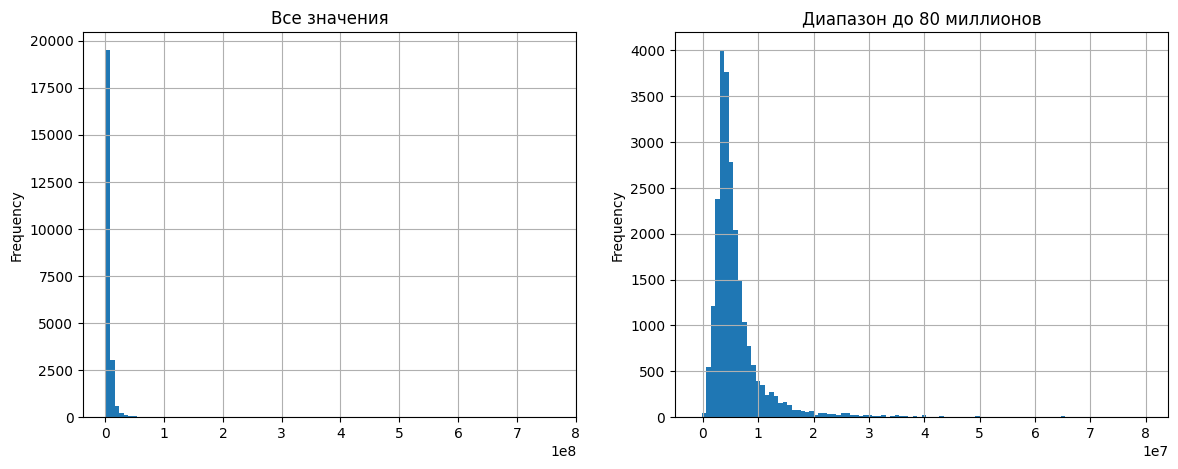

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

df["last_price"].plot(kind="hist", grid=True, bins=100, ax=axs[0], title="Все значения");
df["last_price"].plot(kind="hist", grid=True, bins=100, ax=axs[1],  range=(-1_000_000, 80_000_000), title="Диапазон до 80 миллионов");

plt.show()

Основная масса значений цены лежит в районе от 430 тысяч (минимальное значение) до 10 миллионов. Есть плотненький хвост от 10 миллионов до 20 миллионов, значит на такие квартиры тоже есть спрос. Ну и небольшой, редкий хвост правее 20 миллионов, такие квартиры среднестатистический житель врятли себе может позволить.

### Число комнат.

In [10]:
df["rooms"].describe()

count   23_649.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Медианое значение 2 комнаты, минимальное значение 0 (квартиры студии), максимальное 19 комнат.

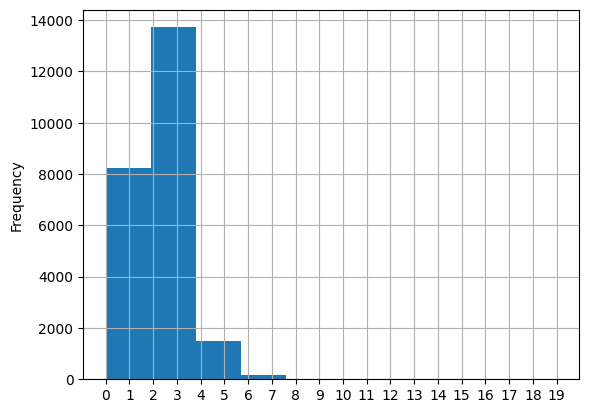

In [11]:
df["rooms"].plot(kind="hist", xticks=range(int(df["rooms"].min()), int(df["rooms"].max()) + 1), grid=True);

В основном у нас 2-х и 3-х комнатные квартиры, что логично, квартиры чаще всего идут с этим количеством комнат.

### Высота потолков.

In [12]:
df["ceiling_height"].describe()

count   23_649.00
mean         2.69
std          0.20
min          2.20
25%          2.60
50%          2.65
75%          2.70
max          4.00
Name: ceiling_height, dtype: float64

Медианое значение 2.65 метра, минимальное значение 2.20 метров, максимальное 4 метра.

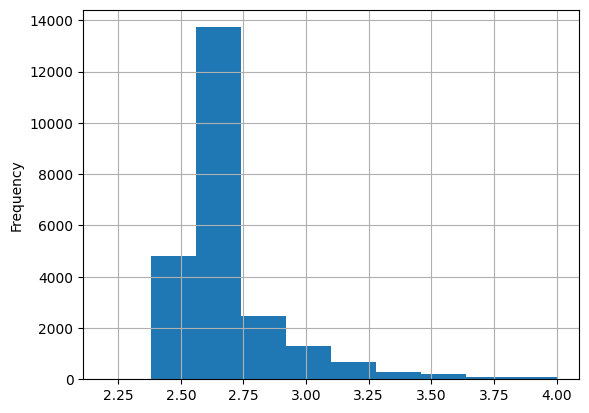

In [13]:
df["ceiling_height"].plot(kind="hist", grid=True);

В основном потолки размером от 2.35 до 2.75 метра, есть небольшой хвост вправо к 4 метрам.

## Инструкция 2: Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

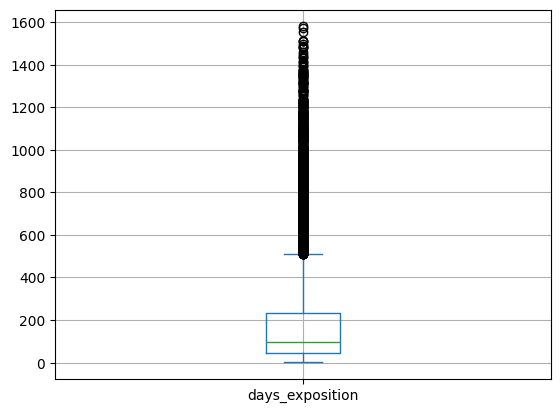

In [14]:
df["days_exposition"].plot(kind="box", grid=True);

Найдём значений усов.

In [15]:
whiskers = get_whiskers(df["days_exposition"])
print(f"Нижний ус: {whiskers[0]}")
print(f"Верхний ус: {whiskers[1]}")

Нижний ус: -234.0
Верхний ус: 510.0


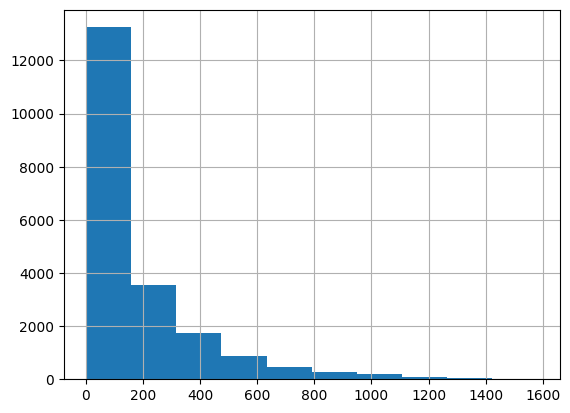

In [16]:
df["days_exposition"].hist();

Графики показывают, что всё что выше 510 дней выбросы. Сделаем срез, чтобы выбросы не искажали результаты.

In [17]:
no_outliars_days_exp = df.query("days_exposition <= 510")

In [18]:
no_outliars_days_exp["days_exposition"].agg(["min", "max"])

min     1.00
max   510.00
Name: days_exposition, dtype: float64

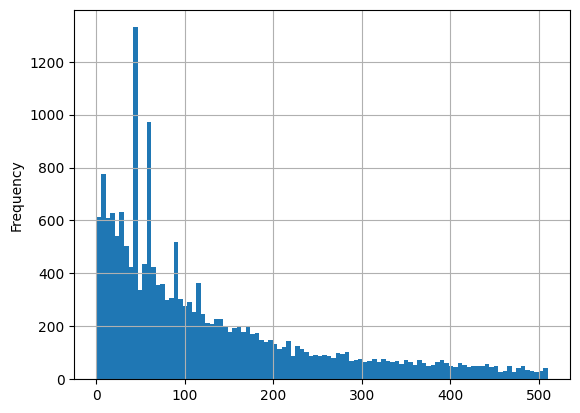

In [19]:
no_outliars_days_exp["days_exposition"].plot(kind="hist", grid=True, bins=100);

Два явных пика на 45 и 60 днях. Возможно в приложении стоят настройки в эти дни автоматически закрывать обьявления.

In [20]:
no_outliars_days_exp["days_exposition"].describe()

count   18_795.00
mean       128.40
std        121.15
min          1.00
25%         41.00
50%         85.00
75%        182.00
max        510.00
Name: days_exposition, dtype: float64

Среднее арифметическое дней продажи равняется 128 дням, а медиана 85 дням, что говорит о явном хвосте вправо, что мы видели на гистограме. Распределение смещено влево, справа есть большой хвост который будет влиять на среднее, поэтому основой для усреднённого значения берём медиану.

Продажа обычно занимает в среднем 85 дней, мы видим это из сводной статистики и гистограммы. Предлагаю считать всё что ниже 25 % перцентиля слишком быстрой продажей, а всё что выше 75 % перцентиля слишком медленной продажей.

## Инструкция 3:  Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [30]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_m2,exposition_day,exposition_month,exposition_year,floor_cat,liv_tot_ratio,kit_tot_ratio
2381,1,4_395_000.00,45.40,2017-10-13,1,2.65,10.00,19.80,7,NaN,False,False,13.20,1,санкт-петербург,34_084.00,14_386.00,1.00,384.00,2.00,433.00,44.00,96_806.17,13,10,2017,другой,0.44,0.29


In [23]:
df_1 = df[["last_price", "total_area", "rooms", "city_centers_nearest"]]

In [29]:
df_1.corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.00,0.65,0.36,-0.21
total_area,0.65,1.00,0.76,-0.23
rooms,0.36,0.76,1.00,-0.18
city_centers_nearest,-0.21,-0.23,-0.18,1.00


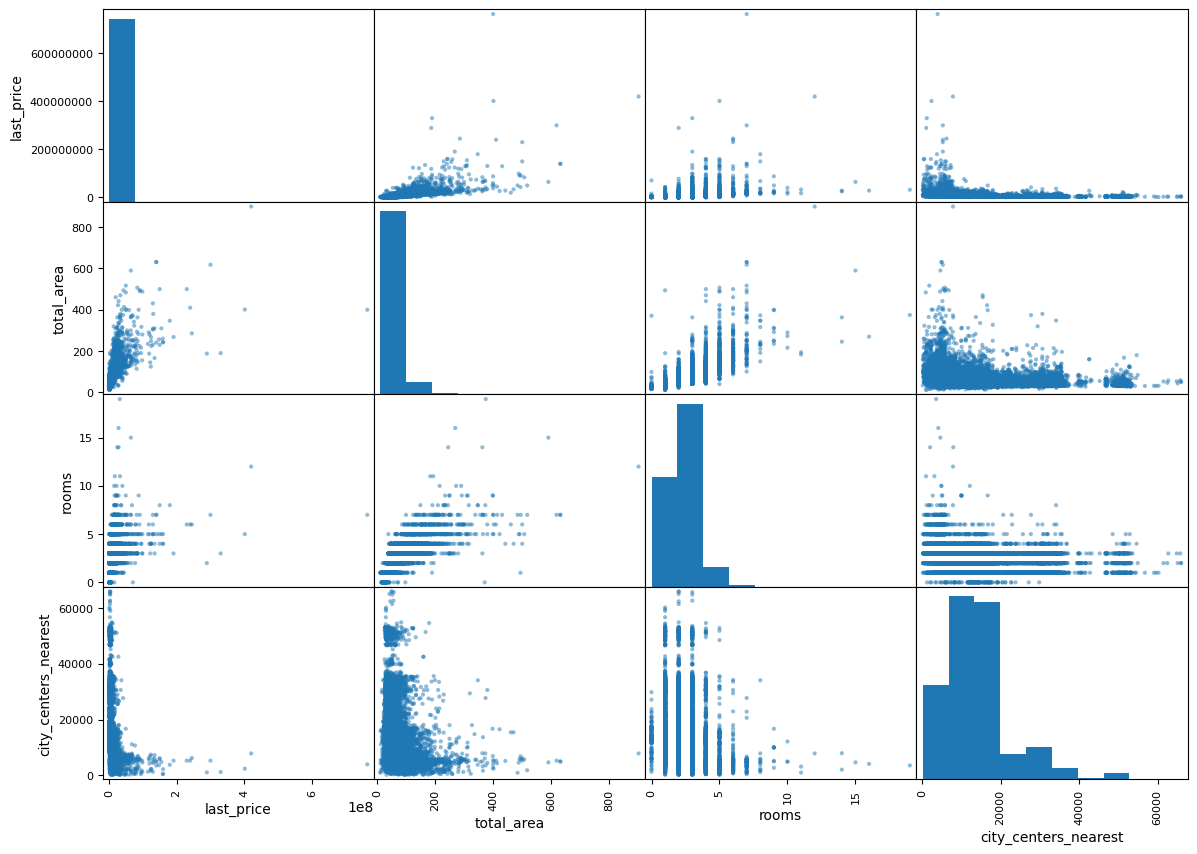

In [33]:
pd.plotting.scatter_matrix(df_1, figsize=(14, 10));

- Умеренная положительная корреляция (0.65) между ценой и общей площадью, чем больше площадь тем больше цена. На графике, после 300 квадратных метров наблюдаются всплески неравномерного повышения цены.
- Умереная положительная корреляция между ценой и количеством комнат (0.36). На графике видим особеность, до числа комнат равном 5 цена повышается, когда число комнат становится выше 5 идёт снижение цены, возможно это продажа комнаты в коммуналке.
- Умерено-низкая отрицательная корреляция между ценой и приближеностью к центру (-0.21). На графике видим явное повышение цен, при приближении к центру, когда расстояние меньше 9 километров.